[(-10.0, 10.0), Text(0.5, 0, 'Time (a.u.)'), Text(0, 0.5, 'Amplitude (a.u.)')]

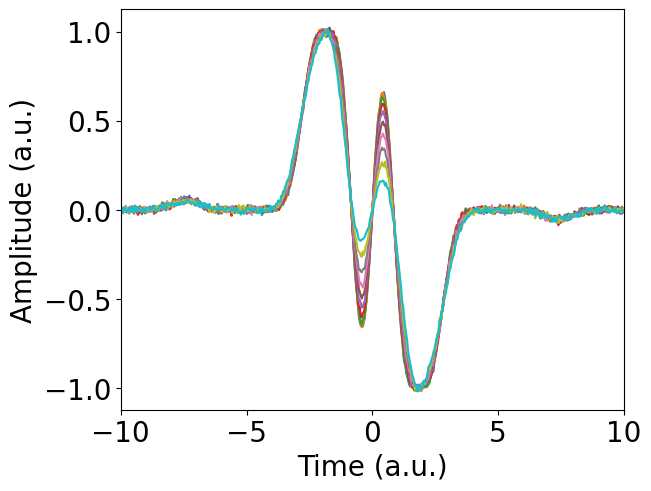

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import matplotlib as mpl


mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.size']=20

rng = np.random.default_rng()


def pulse(
    t: float,
    m: int = 10,
    omega: float = 2 * np.pi,
):
    """
    Generates the pulse to be sent out

    Parameters:
    ============

    t: time point

    m: order of decay

    omega: Bandlimit
    """
    f_n = np.polynomial.Polynomial([0, 8, 0, -14.3984, 0, 4.77612, 0, -0.82315])
    c_m = np.sinc(omega * t / (m * np.pi)) ** m
    return c_m * f_n(t)


def rec(delay, t):
    return 0.5 * (pulse(t - delay / 2) + pulse(t + delay / 2))


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))


def noisy_signal(
    t: np.ndarray,
    delay: float,
    sigma: float = 0.01,
):
    """
    Generate a noisy signal normalized to 1
    """
    return norm2max(rec(delay=delay, t=t)) + rng.normal(scale=sigma, size=t.shape[0])


def generate_waves(
    tlist: np.ndarray,
    distances: np.ndarray,
    reflectivities: np.ndarray,
):
    """
    Generates the returned signal.

    Parameters:
    ===========

    tlist: list of times to generate return signals at

    distances: distances of scatterers

    reflectivites: reflectivites of scatterers

    """

    distances = np.asarray(distances)
    reflectivities = np.asarray(reflectivities)
    # Check equal shape
    if distances.shape != reflectivities.shape:
        raise Exception("Distances and reflectivities should have the same shape.")

    # Normalize reflectivities and distances.
    # Reflectivities should all add to 1.
    pass

t = np.linspace(-10, 10, 500)
shift_list = np.linspace(0, 0.7, 10)
ret_sigs = np.vstack([noisy_signal(t=t, delay=delay) for delay in shift_list])
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(t, ret_sigs.T)
ax.set(
    xlim=(np.min(t), np.max(t)),
    xlabel="Time (a.u.)",
    ylabel="Amplitude (a.u.)",
)



# Data prep

In [ ]:
def create_data(data_size):
    shifts = 0.7*rng.random(size=data_size) # since only shifts of upto 0.7 work so far
    t = np.linspace(-10, 10, 500)
    signals = np.vstack([noisy_signal(t=t, delay=delay) for delay in shifts])
    return np.array(signals)[:, :, np.newaxis], np.array(shifts)

x1, y1 = create_data(100000)

x1.shape, y1.shape

((100000, 500, 1), (100000,))

In [ ]:
X_train1, y_train1 = x1[:60000], y1[:60000]
X_val1, y_val1 = x1[60000:65000], y1[60000:65000]
X_test1, y_test1 = x1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 500, 1), (60000,), (5000, 500, 1), (5000,), (35000, 500, 1), (35000,))

[Text(0.5, 1.0, 'Test')]

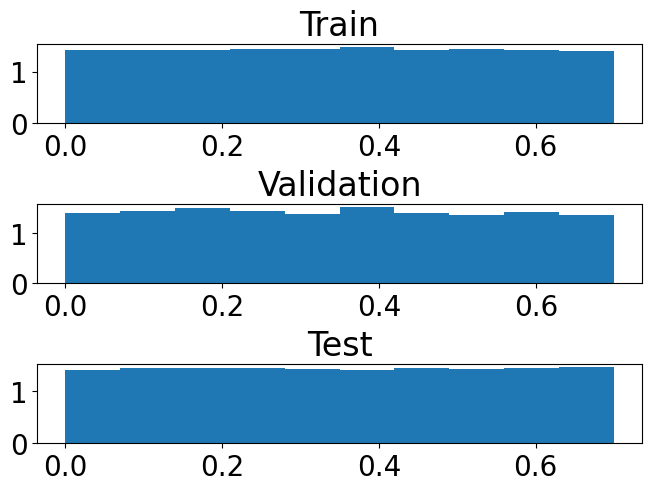

In [ ]:
counts_train1, bins_train1 = np.histogram(y_train1, density=True)
counts_val1, bins_val1 = np.histogram(y_val1, density=True)
counts_test1, bins_test1 = np.histogram(y_test1, density=True)
fig, ax = plt.subplots(3,1, layout='constrained')
ax[0].stairs(counts_train1, bins_train1, fill=True)
ax[0].set(title="Train")
ax[1].stairs(counts_val1, bins_val1, fill=True)
ax[1].set(title="Validation")
ax[2].stairs(counts_test1, bins_test1, fill=True)
ax[2].set(title="Test")

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

def create_dense_model(input_size: int=500):
    """
    Create a dense model with a given input side
    """
    return Sequential(
        layers = [
            InputLayer((input_size, 1)),
            Dense(500, 'relu'),
            Dense(50, 'relu'),
            Dense(1, 'linear')

        ]
    )


def create_LSTM_model(input_size: int=500, lstm_units: int=64):
    """
    Create an LSTM model with a given input side
    """
    return Sequential(
        layers = [
            InputLayer((input_size, 1)),
            LSTM(lstm_units),
            Dense(50, 'relu'),
            Dense(1, 'linear')

        ]
    )

def create_RNN_model(input_size: int=500, lstm_units: int=64):
    """
    Create an LSTM model with a given input side
    """
    return Sequential(
        layers = [
            InputLayer((input_size, 1)),
            LSTM(lstm_units),
            Dense(50, 'relu'),
            Dense(1, 'linear')

        ]
    )

def create_Conv1D_model(input_size: int=500, lstm_units: int=64):
    """
    Create an LSTM model with a given input side
    """
    return Sequential(
        layers = [
            InputLayer((input_size, 1)),
            LSTM(lstm_units),
            Dense(50, 'relu'),
            Dense(1, 'linear')

        ]
    )

def create_GRU_model(input_size: int=500, gru_units: int=128):
    """
    Create a GRU model with a given input side
    """
    return Sequential(
        layers = [
            InputLayer((input_size, 1)),
            GRU(gru_units),
            Dense(50, 'relu'),
            Dense(1, 'linear')

        ]
    )

model1 = create_LSTM_model(500)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 50)                6450      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 56805 (221.89 KB)
Trainable params: 56805 (221.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=1e-4), metrics=[RootMeanSquaredError()])
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
  15/1875 [..............................] - ETA: 8:58 - loss: 0.1533 - root_mean_squared_error: 0.3916

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_error = np.abs((train_predictions - y_train1)/y_train1)
test_predictions = model1.predict(X_test1).flatten()
test_error = np.abs((test_predictions - y_test1)/y_test1)

In [ ]:
fig2 = plt.figure(figsize=(10,8), layout="constrained")
ax2_dict = fig2.subplot_mosaic([["train_hist", "test_hist"], ["box_plot", "box_plot"]])

ax2_dict["train_hist"].hist(np.clip(train_error, 0,1.1), density=True);
ax2_dict["train_hist"].set(title="Train", ylabel="Counts", xlabel="Absolute Relative Error")
ax2_dict["test_hist"].hist(np.clip(train_error, 0,1.1), density=True);
ax2_dict["test_hist"].set(title="Test", xlabel="Absolute Relative Error")
ax2_dict["box_plot"].boxplot([train_error, test_error], flierprops=dict(marker='.', markerfacecolor='w'), meanline=True,
                  showmeans=True, vert=False)
ax2_dict["box_plot"].set(xscale="log", xlabel="Absolute Relative error", yticklabels=["Train", "Test"]);